In [138]:
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random

random.seed(42)

csv_files = ['BAYZF.csv', 'HON.csv', 'MMM.csv', 'SYF.csv']
fpath = './Data Given/' + csv_files[2]
df = pd.read_csv(fpath)
df = df.dropna()
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
print(df.head(10))


        Date       Open       High        Low      Close
0   1/2/2009  57.549999  59.389999  57.520000  59.189999
1   1/5/2009  58.790001  59.090000  58.110001  58.500000
2   1/6/2009  58.740002  59.810001  58.610001  59.189999
3   1/7/2009  58.610001  58.959999  57.580002  58.070000
4   1/8/2009  57.680000  58.709999  57.450001  58.580002
5   1/9/2009  58.799999  59.009998  57.570000  57.740002
6  1/12/2009  57.639999  57.900002  56.689999  57.080002
7  1/13/2009  56.849998  57.299999  55.709999  56.250000
8  1/14/2009  55.310001  56.000000  54.500000  55.040001
9  1/15/2009  55.080002  55.759998  54.290001  55.169998


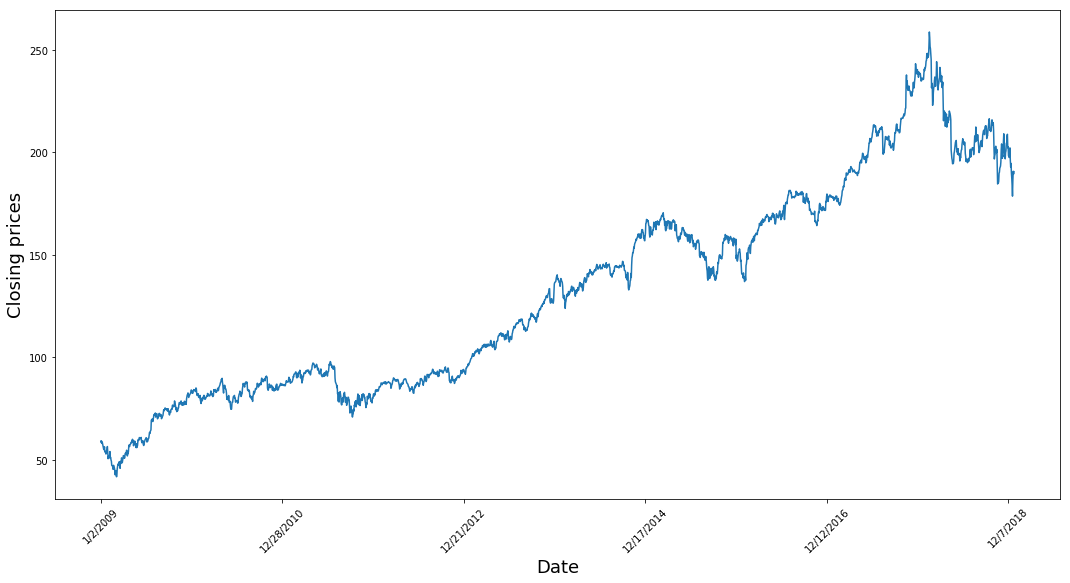

In [139]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), df['Close'])
plt.xticks(range(0,df.shape[0],500), df['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing prices', fontsize=18)
plt.show()

In [140]:
high_prices = df.loc[:, 'High'].values
low_prices = df.loc[:, 'Low'].values
close_prices = df.loc[:, 'Close'].values
mid_prices = (high_prices+low_prices) / 2.0

split_idx = int(0.8*len(close_prices))
train_data = close_prices[:split_idx].reshape(-1, 1)
test_data = close_prices[split_idx:].reshape(-1, 1)

sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(train_data)


In [141]:
X_train = []
Y_train = []

chunk_size = 60
for i in range(chunk_size, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [162]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=5, batch_size=128)
          

Epoch 1/5
1952/1952 [==============================] - 27s 14ms/step - loss: 0.1109
Epoch 2/5
1952/1952 [==============================] - 23s 12ms/step - loss: 0.0175
Epoch 3/5
1952/1952 [==============================] - 21s 11ms/step - loss: 0.0064
Epoch 4/5
1952/1952 [==============================] - 19s 10ms/step - loss: 0.0043
Epoch 5/5
1952/1952 [==============================] - 20s 10ms/step - loss: 0.0043


In [155]:
inputs = close_prices[len(close_prices)-len(test_data)-chunk_size:]
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(chunk_size, len(inputs)):
    X_test.append(inputs[i-chunk_size:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


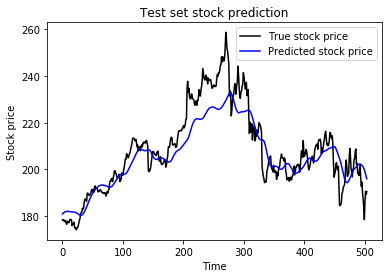

In [156]:
plt.plot(test_data, color='black', label='True stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.title("Test set stock prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [157]:
num_days = 50
predicted_stock_prices = []

for day in range(num_days):
    inputs = list(train_data[len(train_data)-chunk_size + day:]) + predicted_stock_prices
    inputs = np.array(inputs)
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)
    X_test = []
    X_test.append(inputs[-chunk_size:, 0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    predicted_stock_prices.append(predicted_stock_price)

predicted_stock_prices = list(np.array(predicted_stock_prices).flatten())


In [158]:
train_data_flat = list(np.array(train_data).flatten())

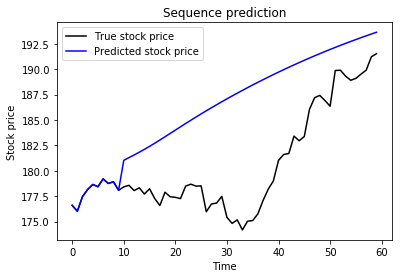

[181.02496, 181.2902, 181.55296, 181.82256, 182.10405, 182.39886, 182.70587, 183.02249, 183.34558, 183.67215, 183.9995, 184.32558, 184.64883, 184.96828, 185.28328, 185.59357, 185.89897, 186.19952, 186.49533, 186.78647, 187.07304, 187.35518, 187.63297, 187.90645, 188.17569, 188.44075, 188.70163, 188.95839, 189.21104, 189.45964, 189.70416, 189.94469, 190.18123, 190.41382, 190.64246, 190.86722, 191.08813, 191.3052, 191.51851, 191.72807, 191.93393, 192.13612, 192.33469, 192.52966, 192.7211, 192.90903, 193.0935, 193.27455, 193.45222, 193.62657]


In [159]:
plt.plot(train_data_flat[-10:]+list(test_data[:num_days]), color='black', label='True stock price')
plt.plot(train_data_flat[-10:]+predicted_stock_prices, color='blue', label='Predicted stock price')
plt.title("Sequence prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()
print(predicted_stock_prices)